In [4]:
import os
import shutil, subprocess, time
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
from pydeseq2.dds import DeseqDataSet
from pydeseq2.dds import DefaultInference
from pydeseq2.ds import DeseqStats
from collections import Counter

In [5]:
data_folder = #Location of the sgRNA sequencing data
processed_folder = #Location where to analyze the data
#make sure to place Veri_sgRNAs.fasta in processed folder

### Verification 2 sgRNA ABE Screen

Make Sample IDs

#in terminal
gunzip *.gz


cutadapt -g TGGAAAGGACGAAACACC...GTTTTAGAGCTAGAAATAGCAAGTTA -j 10 -m 18 -M 23 I75A714_CKDL220019605-1A_HHT7GCCX2_L3_1.fq -o test_cut2.fq

bowtie-build Verification_sgRNA.fasta Veri
bowtie -n 2 -p 20 -q --best --norc -x BCR_ABL_Control_sgRNA test_cut2.fq > results.txt

In [ ]:
os.chdir(data_folder)
for file in os.listdir():
    if file[:5] == 'sgRNA':
        subprocess.call(['cutadapt', '-g', 'TGGAAAGGACGAAACACC...GTTTTAGAGCTAGAAAT', '-j', '20', '-m', '17', '-M', '23',
                         file  , '-o', processed_folder + '/' + file])

In [52]:
os.chdir(processed_folder)

In [9]:
subprocess.call('bowtie-build Veri_sgRNAs.fasta Veri', shell=True)

Settings:
  Output files: "Veri.*.ebwt"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 5 (one in 32)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  Veri_sgRNAs.fasta
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 389
Using parameters --bmax 292 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 292 --dcv 1024
Constructing suffix-array element generator
Building Difference

0

In [ ]:
subprocess.call('gunzip *.gz', shell=True)

In [107]:
day_list = [0,0,0,9,9,9]
rep_list = [1,2,3,1,2,3]
pool_list = range(1,15,1)

samples = []

for day, rep, in zip(day_list, rep_list):
    for pool in pool_list:
        samples.append('sgRNA_D' +  str(day) + '_' + str(pool) + '_' + str(rep) )

In [109]:
for d in samples:
    subprocess.call(['bowtie', '-n', '2', '-p', '20', '-q', '--norc', '--best', '-l', '17','-x', 'Veri', d + '.fq', d + '.txt'])

# reads processed: 658681
# reads with at least one alignment: 651142 (98.86%)
# reads that failed to align: 7539 (1.14%)
Reported 651142 alignments
# reads processed: 56218
# reads with at least one alignment: 55650 (98.99%)
# reads that failed to align: 568 (1.01%)
Reported 55650 alignments
# reads processed: 48881
# reads with at least one alignment: 47551 (97.28%)
# reads that failed to align: 1330 (2.72%)
Reported 47551 alignments
# reads processed: 75252
# reads with at least one alignment: 74257 (98.68%)
# reads that failed to align: 995 (1.32%)
Reported 74257 alignments
# reads processed: 69110
# reads with at least one alignment: 68318 (98.85%)
# reads that failed to align: 792 (1.15%)
Reported 68318 alignments
# reads processed: 30099
# reads with at least one alignment: 26152 (86.89%)
# reads that failed to align: 3947 (13.11%)
Reported 26152 alignments
# reads processed: 85371
# reads with at least one alignment: 84271 (98.71%)
# reads that failed to align: 1100 (1.29%)
Rep

In [110]:
sgNames_fasta = open("Veri_sgRNAs.fasta", "r").read().splitlines()[::2]
sgNames = [sg[1:] for sg in sgNames_fasta]
ScreenDF = pd.DataFrame(sgNames, columns=['sgName'])
ScreenDF.head()

,sgName
0,BCRABL_1769
1,BCRABL_1792
2,BCRABL_1803
3,BCRABL_1817
4,BCRABL_1832


In [111]:
for d in samples:
    Bowtie_output = open((d+".txt"), "r").read().split('\t')
    sgRNA_IDs = Bowtie_output[2::7] #sgRNA ID list
    sg_Frequency = Counter(sgRNA_IDs)
    sgCounts = []
    for sgN in sgNames:
        sgCounts.append(sg_Frequency[sgN])
    ScreenDF[d] = sgCounts
    print([d, len(sgRNA_IDs)])

['sgRNA_D0_1_1', 651142]
['sgRNA_D0_2_1', 55650]
['sgRNA_D0_3_1', 47551]
['sgRNA_D0_4_1', 74257]
['sgRNA_D0_5_1', 68318]
['sgRNA_D0_6_1', 26152]
['sgRNA_D0_7_1', 84271]
['sgRNA_D0_8_1', 59916]
['sgRNA_D0_9_1', 5]
['sgRNA_D0_10_1', 1732759]
['sgRNA_D0_11_1', 1256824]
['sgRNA_D0_12_1', 2499750]
['sgRNA_D0_13_1', 1790741]
['sgRNA_D0_14_1', 1305667]
['sgRNA_D0_1_2', 160376]
['sgRNA_D0_2_2', 72422]
['sgRNA_D0_3_2', 219749]
['sgRNA_D0_4_2', 76895]
['sgRNA_D0_5_2', 193790]
['sgRNA_D0_6_2', 115685]
['sgRNA_D0_7_2', 286490]
['sgRNA_D0_8_2', 118339]
['sgRNA_D0_9_2', 2435436]
['sgRNA_D0_10_2', 726915]
['sgRNA_D0_11_2', 1822521]
['sgRNA_D0_12_2', 1183315]
['sgRNA_D0_13_2', 3871519]
['sgRNA_D0_14_2', 1589592]
['sgRNA_D0_1_3', 272435]
['sgRNA_D0_2_3', 135544]
['sgRNA_D0_3_3', 53011]
['sgRNA_D0_4_3', 200456]
['sgRNA_D0_5_3', 152163]
['sgRNA_D0_6_3', 276448]
['sgRNA_D0_7_3', 174320]
['sgRNA_D0_8_3', 126011]
['sgRNA_D0_9_3', 1454290]
['sgRNA_D0_10_3', 1307461]
['sgRNA_D0_11_3', 1898422]
['sgRNA_D0_12_3

In [112]:
ScreenDF.to_csv('Veri2_sgRNA_Screen.csv')

### Data Analysis and Normalization

In [113]:
#Start from middle
os.chdir(processed_folder)
ScreenDF = pd.read_csv('Veri2_sgRNA_Screen.csv')
ScreenDF = ScreenDF.drop('Unnamed: 0', axis=1)

In [114]:
ScreenDF = ScreenDF.set_index('sgName')
Norm = ScreenDF.div(ScreenDF.sum(0))
ScreenDF_filtered = ScreenDF.mask((Norm < 0.01))

In [115]:
ScreenDF_filtered

,sgRNA_D0_1_1,sgRNA_D0_2_1,sgRNA_D0_3_1,sgRNA_D0_4_1,sgRNA_D0_5_1,sgRNA_D0_6_1,sgRNA_D0_7_1,sgRNA_D0_8_1,sgRNA_D0_9_1,sgRNA_D0_10_1,sgRNA_D0_11_1,sgRNA_D0_12_1,sgRNA_D0_13_1,sgRNA_D0_14_1,sgRNA_D0_1_2,sgRNA_D0_2_2,sgRNA_D0_3_2,sgRNA_D0_4_2,sgRNA_D0_5_2,sgRNA_D0_6_2,sgRNA_D0_7_2,sgRNA_D0_8_2,sgRNA_D0_9_2,sgRNA_D0_10_2,sgRNA_D0_11_2,sgRNA_D0_12_2,sgRNA_D0_13_2,sgRNA_D0_14_2,sgRNA_D0_1_3,sgRNA_D0_2_3,sgRNA_D0_3_3,sgRNA_D0_4_3,sgRNA_D0_5_3,sgRNA_D0_6_3,sgRNA_D0_7_3,sgRNA_D0_8_3,sgRNA_D0_9_3,sgRNA_D0_10_3,sgRNA_D0_11_3,sgRNA_D0_12_3,sgRNA_D0_13_3,sgRNA_D0_14_3,sgRNA_D9_1_1,sgRNA_D9_2_1,sgRNA_D9_3_1,sgRNA_D9_4_1,sgRNA_D9_5_1,sgRNA_D9_6_1,sgRNA_D9_7_1,sgRNA_D9_8_1,sgRNA_D9_9_1,sgRNA_D9_10_1,sgRNA_D9_11_1,sgRNA_D9_12_1,sgRNA_D9_13_1,sgRNA_D9_14_1,sgRNA_D9_1_2,sgRNA_D9_2_2,sgRNA_D9_3_2,sgRNA_D9_4_2,sgRNA_D9_5_2,sgRNA_D9_6_2,sgRNA_D9_7_2,sgRNA_D9_8_2,sgRNA_D9_9_2,sgRNA_D9_10_2,sgRNA_D9_11_2,sgRNA_D9_12_2,sgRNA_D9_13_2,sgRNA_D9_14_2,sgRNA_D9_1_3,sgRNA_D9_2_3,sgRNA_D9_3_3,sgRNA_D9_4_3,sgRNA_D9_5_3,sgRNA_D9_6_3,sgRNA_D9_7_3,sgRNA_D9_8_3,sgRNA_D9_9_3,sgRNA_D9_10_3,sgRNA_D9_11_3,sgRNA_D9_12_3,sgRNA_D9_13_3,sgRNA_D9_14_3
sgName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BCRABL_1769,114408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28049.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,236765.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35748.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCRABL_1792,87722.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCRABL_1803,39447.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9688.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16921.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91553.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16303.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCRABL_1817,51835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12856.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2445.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BCRABL_1832,73178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mROS26_1,17039.0,1211.0,1596.0,1274.0,1544.0,403.0,1457.0,1411.0,NaN,48227.0,35823.0,74692.0,50004.0,241477.0,3572.0,1451.0,8195.0,1184.0,4098.0,1852.0,4428.0,2471.0,55693.0,19862.0,44514.0,34960.0,108302.0,314016.0,6133.0,2732.0,1855.0,3846.0,3199.0,4960.0,2928.0,2389.0,37641.0,40861.0,50993.0,51350.0,36582.0,113356.0,30402.0,2973.0,17270.0,7855.0,5786.0,1235.0,6574.0,11435.0,NaN,52302.0,65194.0,49563.0,83733.0,332360.0,4463.0,6973.0,21475.0,7439.0,6002.0,5227.0,20010.0,28204.0,112093.0,53102.0,54805.0,34368.0,75435.0,305943.0,4122.0,6636.0,20754.0,13936.0,22864.0,8302.0,6583.0,11

In [116]:
ScreenDF_filtered[samples].to_csv('ScreenDF_filtered2.csv')

In [117]:
#Group each D0 and D9 Samples into the same data frame
grouped_samples = []
for pool in range(14):
    temp_list = []
    for day in ['sgRNA_D0_', 'sgRNA_D9_']:
        for rep in range(3):
            temp_list.append(day + str(pool+1) + '_' + str(rep+1))
    grouped_samples.append(temp_list)

In [118]:
samples.sort()

#Group each D0 and D9 Samples into the same data frame
grouped_samples = []
for i in range(0,42,3):
    group = []
    for s in samples[:42][i: i + 3]:
        group.append(s)
    for s in samples[-42:][i: i + 3]:
        group.append(s)
    grouped_samples.append(group)

In [119]:
#Process DataFrame and Run DESeq2
#Veri_D9 Samples had no sgRNAs in it, therefore it was removed
FC_grouped = pd.DataFrame()

for s in grouped_samples:
    if 'sgRNA_D0_9_1' in s:
        s.remove('sgRNA_D0_9_1')
        s.remove('sgRNA_D9_9_1')
    DF_group = ScreenDF_filtered[s]
    DF_group = DF_group.dropna(axis=0) #drop sgRNAs not worth testing
    meta = pd.DataFrame(zip(s, [d.split('_')[1] for d in s]),
                        columns=['sample', 'day']).set_index('sample')
    #Run DESeq2
    inference = DefaultInference(n_cpus=20)
    dds = DeseqDataSet(
    counts=DF_group.T,
    metadata=meta,
    design_factors="day",
    refit_cooks=True,
    n_cpus=20)
    dds.deseq2()
    Veri_Test = DeseqStats(dds, contrast=["day", "D9", "D0"])
    Veri_Test.summary()
    Veri_Test = Veri_Test.results_df
    Veri_Test['FC'] = 2**Veri_Test['log2FoldChange']
    Veri_Test['Group'] = s[0].split('_')[2]
    FC_grouped = pd.concat([FC_grouped, Veri_Test[['FC', 'Group']].reset_index()])

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.01 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

Fitting MAP dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/project

Log2 fold change & Wald test p-value: day D9 vs D0
                  baseMean  log2FoldChange     lfcSE       stat        pvalue  \
sgName                                                                          
BCRABL_1779  532777.777655       -0.517995  0.062255  -8.320571  8.754056e-17   
BCRABL_1826  580514.401111       -0.866343  0.067282 -12.876240  6.124782e-38   
mROS26_1      42786.533158       -0.257498  0.063880  -4.030935  5.555546e-05   
mROS26_2      52182.946961        0.254926  0.131806   1.934104  5.310029e-02   
mROS26_3      57593.278629        0.137569  0.068305   2.014034  4.400602e-02   
mROS26_4      54871.798172        0.154284  0.065398   2.359140  1.831737e-02   
mROS26_5      42766.916509        0.123394  0.067557   1.826513  6.777298e-02   

                     padj  
sgName                     
BCRABL_1779  3.063920e-16  
BCRABL_1826  4.287347e-37  
mROS26_1     1.296294e-04  
mROS26_2     6.195033e-02  
mROS26_3     6.160842e-02  
mROS26_4     3.205539e-

Fitting dispersions...
... done in 0.01 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

Fitting MAP dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import 

Log2 fold change & Wald test p-value: day D9 vs D0
                  baseMean  log2FoldChange     lfcSE       stat  \
sgName                                                            
BCRABL_1780  650098.755805       -1.479475  0.062743 -23.579788   
BCRABL_1827  750154.526498       -1.010809  0.054401 -18.580632   
mROS26_1      54327.312825       -0.348160  0.094840  -3.671017   
mROS26_2      66950.888909        0.302945  0.053625   5.649316   
mROS26_3      74933.325357        0.043649  0.044042   0.991096   
mROS26_4      65021.635871        0.147468  0.080171   1.839431   
mROS26_5      49172.975024        0.124859  0.068802   1.814772   

                    pvalue           padj  
sgName                                     
BCRABL_1780  6.213994e-123  4.349796e-122  
BCRABL_1827   4.610414e-77   1.613645e-76  
mROS26_1      2.415875e-04   4.227781e-04  
mROS26_2      1.610876e-08   3.758710e-08  
mROS26_3      3.216389e-01   3.216389e-01  
mROS26_4      6.585187e-02   8.115220

Fitting dispersions...
... done in 0.01 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

Fitting MAP dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import 

Log2 fold change & Wald test p-value: day D9 vs D0
                  baseMean  log2FoldChange     lfcSE      stat        pvalue  \
sgName                                                                         
BCRABL_1781  512149.073813       -0.765916  0.076938 -9.954995  2.398355e-23   
BCRABL_1828  869595.064732        0.122817  0.077771  1.579203  1.142895e-01   
mROS26_1      47110.546756       -0.354188  0.066945 -5.290702  1.218478e-07   
mROS26_2      53253.543204        0.179354  0.082835  2.165191  3.037307e-02   
mROS26_3      64154.623591       -0.006456  0.070316 -0.091819  9.268421e-01   
mROS26_4      61027.083281        0.107030  0.071181  1.503643  1.326733e-01   
mROS26_5      45136.540742        0.120602  0.094233  1.279825  2.006065e-01   

                     padj  
sgName                     
BCRABL_1781  1.678849e-22  
BCRABL_1828  1.857427e-01  
mROS26_1     4.264672e-07  
mROS26_2     7.087049e-02  
mROS26_3     9.268421e-01  
mROS26_4     1.857427e-01  
mROS

Fitting dispersions...
... done in 0.01 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

Fitting MAP dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import 

Log2 fold change & Wald test p-value: day D9 vs D0
                  baseMean  log2FoldChange     lfcSE       stat  \
sgName                                                            
BCRABL_1782  943878.144878       -0.034917  0.067711  -0.515677   
BCRABL_1829  781533.480808       -1.837667  0.070340 -26.125484   
mROS26_1      62544.518697       -0.242089  0.078064  -3.101149   
mROS26_2      72097.152060        0.169697  0.085053   1.995185   
mROS26_3      89626.192577        0.103075  0.072141   1.428792   
mROS26_4      75916.712900        0.159812  0.077138   2.071760   
mROS26_5      57043.274997        0.115144  0.116112   0.991661   

                    pvalue           padj  
sgName                                     
BCRABL_1782   6.060803e-01   6.060803e-01  
BCRABL_1829  1.872236e-150  1.310565e-149  
mROS26_1      1.927712e-03   6.746993e-03  
mROS26_2      4.602274e-02   8.053980e-02  
mROS26_3      1.530640e-01   2.142896e-01  
mROS26_4      3.828785e-02   8.053980

Fitting dispersions...
... done in 0.01 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__i

Log2 fold change & Wald test p-value: day D9 vs D0
               baseMean  log2FoldChange     lfcSE      stat        pvalue  \
sgName                                                                      
mROS26_1  204712.930759       -0.245961  0.035255 -6.976601  3.024062e-12   
mROS26_2  243089.636826        0.062265  0.031326  1.987660  4.684925e-02   
mROS26_3  259160.389391        0.040050  0.025353  1.579704  1.141746e-01   
mROS26_4  255437.362314        0.001943  0.021652  0.089742  9.284919e-01   
mROS26_5  194551.868656       -0.003485  0.039375 -0.088499  9.294798e-01   

                  padj  
sgName                  
mROS26_1  1.512031e-11  
mROS26_2  1.171231e-01  
mROS26_3  1.902911e-01  
mROS26_4  9.294798e-01  
mROS26_5  9.294798e-01  


Fitting dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip p

Log2 fold change & Wald test p-value: day D9 vs D0
                 baseMean  log2FoldChange     lfcSE       stat         pvalue  \
sgName                                                                          
BCRABL_1769  61137.905069        0.032576  0.054322   0.599685   5.487161e-01   
BCRABL_1792  27995.115291       -2.216762  0.095317 -23.256801  1.214095e-119   
BCRABL_1803  24419.978375        0.360869  0.131101   2.752604   5.912333e-03   
BCRABL_1817  16434.360610       -2.643985  0.126764 -20.857588   1.300673e-96   
BCRABL_1832  43779.746447        0.202476  0.089103   2.272375   2.306386e-02   
BCRABL_1840  25660.585409        0.094145  0.067867   1.387200   1.653808e-01   
BCR2_1047    12358.612879       -2.295630  0.125994 -18.220194   3.568873e-74   
BCRABL_1863  32699.833854       -0.885114  0.072571 -12.196520   3.243940e-34   
mROS26_1      7789.133691       -0.184583  0.095895  -1.924851   5.424796e-02   
mROS26_2      8173.903540        0.207887  0.102195   2.03

Fitting dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip p

Log2 fold change & Wald test p-value: day D9 vs D0
                 baseMean  log2FoldChange     lfcSE       stat         pvalue  \
sgName                                                                          
BCRABL_1770  18660.677939        0.398475  0.073152   5.447211   5.116576e-08   
BCRABL_1793   9051.710750       -2.829424  0.103361 -27.374302  5.548957e-165   
BCRABL_1804   6391.778360        0.018469  0.074003   0.249572   8.029183e-01   
BCRABL_1818   6956.841190       -2.516167  0.128520 -19.578071   2.378585e-85   
BCRABL_1831   7543.424192       -1.869955  0.115872 -16.138153   1.375976e-58   
BCRABL_1841   7240.783119       -0.351528  0.098010  -3.586634   3.349744e-04   
BCR2_483     14931.082056       -2.158689  0.092979 -23.217038  3.063885e-119   
BCRABL_1864   6786.994812       -2.633179  0.144552 -18.216121   3.844592e-74   
BCRABL_1877  13251.650132        0.305633  0.074854   4.083070   4.444467e-05   
BCRABL_1805   6469.295218       -0.016300  0.073197  -0.22

Fitting dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip p

Log2 fold change & Wald test p-value: day D9 vs D0
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
sgName                                                                         
BCRABL_1772  28304.739588       -0.060926  0.094961  -0.641588  5.211408e-01   
BCRABL_1794  19553.871276       -1.796342  0.113834 -15.780416  4.243834e-56   
BCRABL_1805  13384.419870       -0.440600  0.102235  -4.309654  1.635100e-05   
BCRABL_1821  18199.969040       -0.858775  0.139864  -6.140064  8.248816e-10   
BCRABL_1833  17749.223828        0.305008  0.117921   2.586544  9.694391e-03   
BCR2_445     15519.732468        0.334466  0.116851   2.862320  4.205516e-03   
BCRABL_1855  16661.909614       -2.921704  0.151913 -19.232794  1.967366e-82   
BCR2_851     11447.944753       -2.146071  0.137827 -15.570719  1.151063e-54   
mROS26_1      7774.841045        0.079622  0.113797   0.699688  4.841221e-01   
mROS26_2      8299.681926        0.409617  0.116806   3.506824  4.534

Fitting dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip p

Log2 fold change & Wald test p-value: day D9 vs D0
                 baseMean  log2FoldChange     lfcSE       stat         pvalue  \
sgName                                                                          
BCRABL_1773  42999.470077        0.542290  0.099168   5.468396   4.541257e-08   
BCRABL_1795  13929.805071       -2.212666  0.087070 -25.412531  1.833346e-142   
BCRABL_1808  36259.896531        0.290672  0.097187   2.990862   2.781911e-03   
BCRABL_1822  15150.154374       -2.051862  0.091254 -22.485169  5.797900e-112   
BCRABL_1835  17868.151251       -0.198690  0.084412  -2.353812   1.858201e-02   
BCRABL_1843  27022.691977        0.061478  0.084322   0.729086   4.659489e-01   
BCRABL_1861  36906.279240       -0.623680  0.120726  -5.166076   2.390595e-07   
BCRABL_1872  15756.115775       -0.738297  0.097994  -7.534122   4.916312e-14   
mROS26_1      4107.919978       -0.128484  0.102564  -1.252721   2.103071e-01   
mROS26_2      4783.215325        0.121255  0.087892   1.37

Fitting dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip p

Log2 fold change & Wald test p-value: day D9 vs D0
                 baseMean  log2FoldChange     lfcSE       stat         pvalue  \
sgName                                                                          
BCRABL_1774  29159.972917        0.316238  0.068709   4.602560   4.173301e-06   
BCR2_147     23875.088817       -2.322768  0.071679 -32.405187  2.319720e-230   
BCRABL_1809  42413.812146        0.119292  0.068584   1.739364   8.197084e-02   
BCRABL_1824  19650.071253       -1.844325  0.116589 -15.819025   2.300256e-56   
BCR2_302     19257.844407       -1.412492  0.079334 -17.804327   6.541438e-71   
BCR2_357     37772.131725        0.068401  0.074731   0.915300   3.600341e-01   
BCRABL_1868  10545.591518       -2.307454  0.084411 -27.335962  1.585999e-164   
mROS26_1      5054.932784       -0.209127  0.074898  -2.792142   5.236041e-03   
mROS26_2      5499.358254        0.158040  0.077182   2.047628   4.059646e-02   
mROS26_3      7137.312456        0.173951  0.074941   2.32

Fitting dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip p

Log2 fold change & Wald test p-value: day D9 vs D0
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
sgName                                                                         
BCRABL_1775  28206.652824        0.671523  0.048222  13.925671  4.423672e-44   
BCRABL_1796  10532.733023       -1.018402  0.076254 -13.355304  1.103075e-40   
BCRABL_1810  40526.502880        0.080000  0.044812   1.785249  7.422094e-02   
BCRABL_1825  14964.401514       -0.752089  0.060853 -12.359090  4.350535e-35   
BCR2_842     22917.971610       -0.439897  0.042618 -10.321832  5.614185e-25   
BCR2_975     12922.348531       -0.885093  0.071326 -12.409188  2.330025e-35   
mROS26_1      2434.241725       -0.107062  0.122727  -0.872355  3.830149e-01   
mROS26_2      2986.745600        0.445533  0.131332   3.392415  6.927951e-04   
mROS26_3      3490.475024        0.149952  0.124351   1.205881  2.278632e-01   
mROS26_4      3231.560721        0.328164  0.111076   2.954411  3.132

Fitting dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip p

Log2 fold change & Wald test p-value: day D9 vs D0
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
sgName                                                                         
BCRABL_1777  46209.110744        0.526481  0.097015   5.426801  5.737293e-08   
BCRABL_1797  53488.003613       -0.611012  0.082814  -7.378125  1.605340e-13   
BCR2_487     42284.114110       -0.900826  0.100656  -8.949522  3.570258e-19   
BCRABL_1823  25298.909935       -0.861821  0.079285 -10.869870  1.604288e-27   
BCR2_675     61447.447233        0.138780  0.080994   1.713454  8.662904e-02   
BCRABL_1874  25407.787840       -1.079826  0.096593 -11.179179  5.156477e-29   
mROS26_1      4979.332860       -0.104763  0.095485  -1.097165  2.725693e-01   
mROS26_2      5625.563298        0.259799  0.106458   2.440383  1.467171e-02   
mROS26_3      7422.934362        0.312478  0.095536   3.270780  1.072511e-03   
mROS26_4      6757.291680        0.310781  0.106739   2.911611  3.595

Fitting dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip p

Log2 fold change & Wald test p-value: day D9 vs D0
                 baseMean  log2FoldChange     lfcSE       stat        pvalue  \
sgName                                                                         
BCRABL_1778  50417.319905        0.397527  0.125574   3.165674  1.547243e-03   
BCRABL_1798  36112.088385       -0.346226  0.106568  -3.248873  1.158632e-03   
BCRABL_1811  39544.337875       -2.373248  0.117669 -20.168886  1.837305e-90   
BCR2_1111    19023.538428       -2.349714  0.203307 -11.557477  6.766793e-31   
BCR2_1099    50356.991735        0.129667  0.106638   1.215950  2.240040e-01   
BCRABL_1875  33015.580786        0.063404  0.098256   0.645300  5.187327e-01   
mROS26_1      5789.277576       -0.225144  0.149048  -1.510551  1.309029e-01   
mROS26_2      6215.783048        0.213738  0.149965   1.425254  1.540838e-01   
mROS26_3      7612.882946        0.146171  0.160121   0.912879  3.613061e-01   
mROS26_4      7807.176036        0.258550  0.150821   1.714282  8.647

Fitting dispersions...
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ivan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
... done in 0.62 seconds.

Fitting dispersion trend curve...
... done in 0.01 seconds.

/home/ivan/.local/lib/python3.10/site-packages/pydeseq2/dds.py:490: UserWarning: As the residual degrees of freedom is less than 3, the distrib

Log2 fold change & Wald test p-value: day D9 vs D0
                  baseMean  log2FoldChange     lfcSE       stat  \
sgName                                                            
BCRABL_1776  301207.796948       -3.847221  0.146656 -26.233042   
BCRABL_1800  306725.801852       -2.160342  0.147772 -14.619432   
BCR2_962     485890.331613       -1.271024  0.139567  -9.106925   
BCRABL_1876  426838.425297       -1.083700  0.162463  -6.670456   
mROS26_1      65169.488761        0.015028  0.132126   0.113744   
mROS26_2      78706.239449        0.464986  0.177768   2.615682   
mROS26_3      92492.204844        0.278936  0.138291   2.017021   
mROS26_4      79209.931257        0.402852  0.142332   2.830369   
mROS26_5      63317.676515        0.520174  0.143872   3.615525   

                    pvalue           padj  
sgName                                     
BCRABL_1776  1.116097e-151  1.004487e-150  
BCRABL_1800   2.111546e-48   9.501958e-48  
BCR2_962      8.475010e-20   2.5425

In [120]:
#normalize growth rate of negative controls to WT growth rate 
control_FC = FC_grouped.loc[FC_grouped['sgName'].isin(['mROS26_1', 'mROS26_2','mROS26_3','mROS26_4','mROS26_5'])]
mean_control_FC = control_FC[['Group', 'FC']].groupby('Group').mean().reset_index()
mean_control_FC.columns = ['Group', 'control_FC']
FC_group_control = pd.merge(FC_grouped, mean_control_FC, on='Group')
FC_group_control['Norm_FC'] = FC_group_control['FC']/FC_group_control['control_FC']
FC_group_control['sgRNA_r'] = np.log(FC_group_control['Norm_FC']*np.exp(0.055*24*9))/(24*9)

In [121]:
FC_group_control.loc[FC_group_control['sgName'].isin(['mROS26_1', 'mROS26_2','mROS26_3','mROS26_4','mROS26_5']), ['sgName', 'sgRNA_r']].groupby('sgName').mean()

,sgRNA_r
sgName,
mROS26_1,0.053951
mROS26_2,0.055330
mROS26_3,0.055015
mROS26_4,0.055192
mROS26_5,0.055337


mROS26_1 has a small delaterious effect

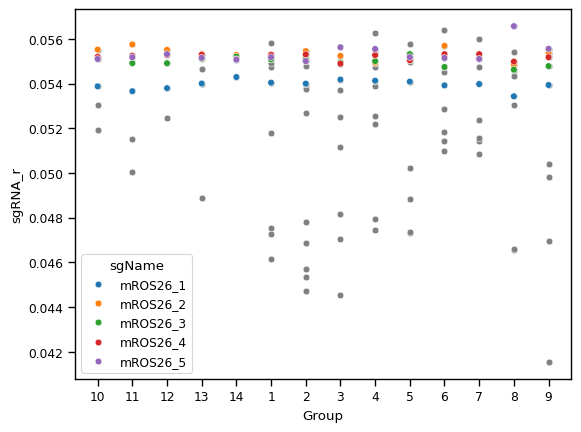

In [122]:
sol = sns.scatterplot(x='Group', y='sgRNA_r', color='gray',data=FC_group_control)
sns.scatterplot(x='Group', y='sgRNA_r', hue='sgName',data=FC_group_control.loc[FC_group_control['sgName'].isin(['mROS26_1', 'mROS26_2','mROS26_3','mROS26_4','mROS26_5'])])
sol.figure.savefig('normalized_growth_rates.png', dpi=500)

In [123]:
FC_group_control.to_csv('FC_group_control.csv')

In [124]:
#compare to full screen
Screen = pd.read_csv('DESeq2_FC_NEW_Screen.csv')
Screen['Screen_sgRNA_r'] = np.log(Screen['ABE_D0']*np.exp(0.055*9*24))/(9*24)
Veri2_Screen = pd.merge(FC_group_control, Screen[['sgName', 'Screen_sgRNA_r']], how='left', on='sgName').dropna()

In [125]:
stats.pearsonr(Veri2_Screen['sgRNA_r'], Veri2_Screen['Screen_sgRNA_r'])

PearsonRResult(statistic=0.8688947791944827, pvalue=9.280642770551982e-23)

In [126]:
Veri2_Screen

,sgName,FC,Group,control_FC,Norm_FC,sgRNA_r,Screen_sgRNA_r
0,BCRABL_1779,0.698342,10,1.066405,0.654856,0.053040,0.054447
1,BCRABL_1826,0.548535,10,1.066405,0.514378,0.051922,0.053625
7,BCRABL_1780,0.358619,11,1.049598,0.341673,0.050028,0.054277
8,BCRABL_1827,0.496268,11,1.049598,0.472817,0.051532,0.053789
14,BCRABL_1781,0.588080,12,1.014884,0.579455,0.052474,0.053910
...,...,...,...,...,...,...,...
126,BCRABL_1875,1.044929,8,1.200614,0.870328,0.054357,0.055245
132,BCRABL_1776,0.069482,9,1.272064,0.054621,0.041540,0.051177
133,BCRABL_1800,0.223703,9,1.272064,0.175858,0.046953,0.052082
134,BCR2_962,0.414366,9,1.272064,0.325743,0.049807,0.054682


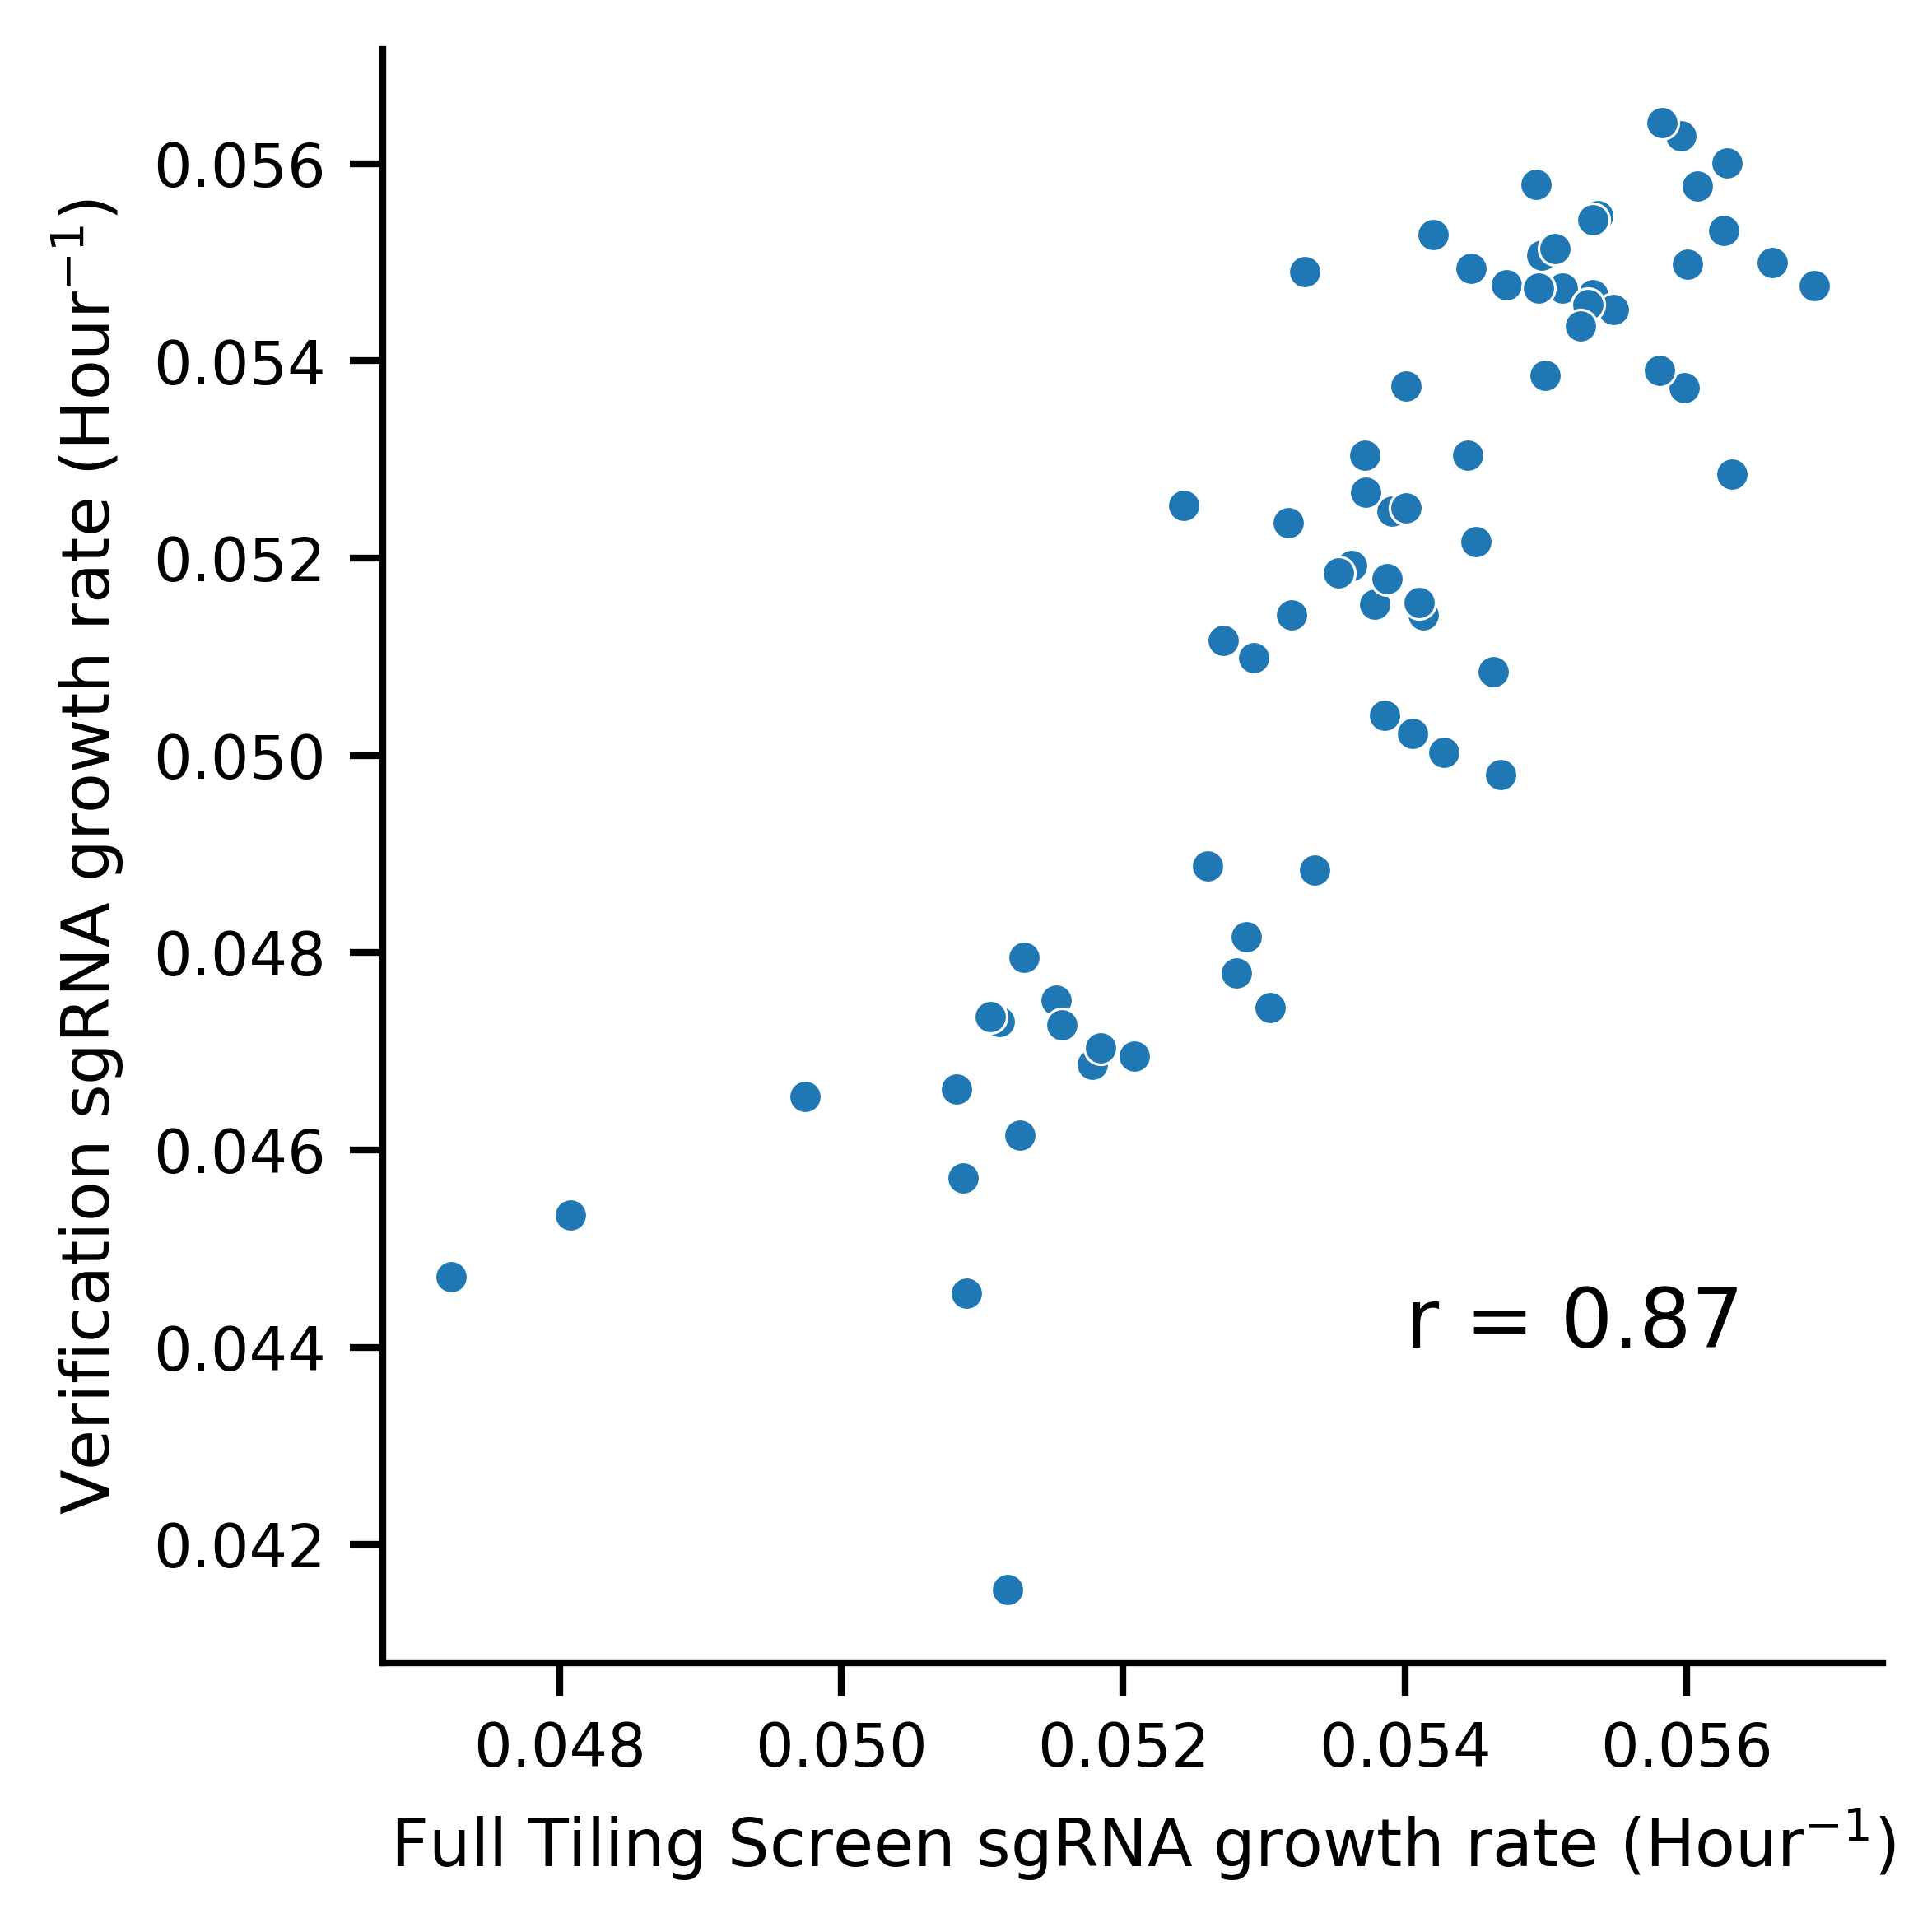

In [127]:
sns.set_context('paper')
plt.figure(figsize=(4,4), dpi=600)
Veri2 = sns.scatterplot(x='Screen_sgRNA_r', y='sgRNA_r', data=Veri2_Screen)
Veri2.set( xlabel=' Full Tiling Screen sgRNA growth rate (Hour$^{-1}$)', ylabel='Verification sgRNA growth rate (Hour$^{-1}$)')
plt.text(0.054, 0.044, 'r = 0.87', fontsize=12)
sns.despine()
plt.tight_layout()
Veri2.figure.savefig('Veri2 v NEW Screen2_250709.PDF', transparent=True)